# Luke Weeks
# Key Bank Capital Markets
# Project 2

In [1]:
#importing the libraries 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as date
import statsmodels.api as sms
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import copy

import warnings
warnings.filterwarnings('ignore')

/Users/lukeweeks/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', '{:,.2f}'.format)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('ctap_analytics_pnl_decomp_sample_day.csv') 
# read the data as an orignal

In [4]:
df = data.copy()
#copying data into a data frame

In [5]:
df.head()

,timestamp,type,cusip,spread_pnl,benchmark_cusip,new_position,ticker,securitydes,industrySector,mat_bucket,liq_score,liq_bucket,weightedage
0,2021-07-28 06:00:00.000000,MARK,718172CQ0,-0.62,91282CCK5,-39,PM,PM 1 1/8 05/01/23,"Consumer, Non-cyclical",B02,1487,LB1000,6.85
1,2021-07-28 06:00:00.000000,MARK,718172CQ0,-0.62,91282CCK5,-39,PM,PM 1 1/8 05/01/23,"Consumer, Non-cyclical",B02,1487,LB1000,6.85
2,2021-07-28 06:00:00.000000,MARK,03073EAS4,0.06,91282CCK5,5,ABC,ABC 0.737 03/15/23,"Consumer, Non-cyclical",B02,427,LB0250,1.00
3,2021-07-28 06:00:00.000000,MARK,723484AH4,0.29,91282CCJ8,-13,PNW,PNW 1.3 06/15/25,Utilities,B05,2533,LB2000,27.00
4,2021-07-28 06:00:00.000000,MARK,742718ER6,-0.21,91282CCJ8,2,PG,PG 2.45 11/03/26,"Consumer, Non-cyclical",B05,1916,LB1000,10.00


In [6]:
df.shape
#checking the dimensions of the data

(55718, 13)

In [7]:
df.info()
#Looking at the Data Types of the Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55718 entries, 0 to 55717
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        55718 non-null  object 
 1   type             55718 non-null  object 
 2   cusip            55718 non-null  object 
 3   spread_pnl       55718 non-null  float64
 4   benchmark_cusip  55718 non-null  object 
 5   new_position     55718 non-null  int64  
 6   ticker           55718 non-null  object 
 7   securitydes      55718 non-null  object 
 8   industrySector   55718 non-null  object 
 9   mat_bucket       55718 non-null  object 
 10  liq_score        55718 non-null  int64  
 11  liq_bucket       55718 non-null  object 
 12  weightedage      55716 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 5.5+ MB


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
df.info()
#checking to see that datetime took

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55718 entries, 0 to 55717
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        55718 non-null  datetime64[ns]
 1   type             55718 non-null  object        
 2   cusip            55718 non-null  object        
 3   spread_pnl       55718 non-null  float64       
 4   benchmark_cusip  55718 non-null  object        
 5   new_position     55718 non-null  int64         
 6   ticker           55718 non-null  object        
 7   securitydes      55718 non-null  object        
 8   industrySector   55718 non-null  object        
 9   mat_bucket       55718 non-null  object        
 10  liq_score        55718 non-null  int64         
 11  liq_bucket       55718 non-null  object        
 12  weightedage      55716 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 5.5+ MB


In [10]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,55718,159,2021-07-28 20:55:00,470,2021-07-28 06:00:00,2021-07-28 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,55718,1,MARK,55718,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cusip,55718,476,458140BH2,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spread_pnl,"55,718.00",NaN,NaN,NaN,NaT,NaT,0.00,3.23,-122.42,-0.18,0.0,0.20,103.07
benchmark_cusip,55718,4,91282CCJ8,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_position,"55,718.00",NaN,NaN,NaN,NaT,NaT,11.34,65.69,-250.00,-18.00,7.0,38.00,250.00
ticker,55718,189,GM,1955,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
securitydes,55718,475,ABIBB 3.65 02/01/26,269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industrySector,55718,9,Financial,17194,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mat_bucket,55718,4,B05,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#turning the identifiable attributes to catrogies
df["mat_bucket"]=df["mat_bucket"].astype("category")
df["liq_bucket"]=df["liq_bucket"].astype("category")
df["industrySector"]=df["industrySector"].astype("category")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55718 entries, 0 to 55717
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        55718 non-null  datetime64[ns]
 1   type             55718 non-null  object        
 2   cusip            55718 non-null  object        
 3   spread_pnl       55718 non-null  float64       
 4   benchmark_cusip  55718 non-null  object        
 5   new_position     55718 non-null  int64         
 6   ticker           55718 non-null  object        
 7   securitydes      55718 non-null  object        
 8   industrySector   55718 non-null  category      
 9   mat_bucket       55718 non-null  category      
 10  liq_score        55718 non-null  int64         
 11  liq_bucket       55718 non-null  category      
 12  weightedage      55716 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 4.4+ MB


In [13]:
df.isna().sum()

timestamp          0
type               0
cusip              0
spread_pnl         0
benchmark_cusip    0
new_position       0
ticker             0
securitydes        0
industrySector     0
mat_bucket         0
liq_score          0
liq_bucket         0
weightedage        2
dtype: int64

In [14]:
wtage = df["weightedage"]
wtage.head().T

0    6.85
1    6.85
2    1.00
3   27.00
4   10.00
Name: weightedage, dtype: float64

In [15]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

       weightedage
40764          NaN
47818          NaN


In [16]:
null_columns=df.columns[df.isnull().any()]

In [17]:
print(df[df["weightedage"].isnull()][null_columns])

       weightedage
40764          NaN
47818          NaN


In [18]:
print(df.loc[[40764,47818]])

                timestamp  type      cusip  spread_pnl benchmark_cusip  \
40764 2021-07-28 18:25:00  MARK  37045VAW0        3.43       91282CCK5   
47818 2021-07-28 20:00:00  MARK  031162CJ7        1.97       91282CCJ8   

       new_position ticker        securitydes          industrySector  \
40764           -13     GM    GM 5.4 10/02/23      Consumer, Cyclical   
47818             8   AMGN  AMGN 2.6 08/19/26  Consumer, Non-cyclical   

      mat_bucket  liq_score liq_bucket  weightedage  
40764        B02        839     LB0500          NaN  
47818        B05       1222     LB1000          NaN  


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55718 entries, 0 to 55717
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        55718 non-null  datetime64[ns]
 1   type             55718 non-null  object        
 2   cusip            55718 non-null  object        
 3   spread_pnl       55718 non-null  float64       
 4   benchmark_cusip  55718 non-null  object        
 5   new_position     55718 non-null  int64         
 6   ticker           55718 non-null  object        
 7   securitydes      55718 non-null  object        
 8   industrySector   55718 non-null  category      
 9   mat_bucket       55718 non-null  category      
 10  liq_score        55718 non-null  int64         
 11  liq_bucket       55718 non-null  category      
 12  weightedage      55716 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 4.4+ MB


In [20]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,55718,159,2021-07-28 20:55:00,470,2021-07-28 06:00:00,2021-07-28 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,55718,1,MARK,55718,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cusip,55718,476,458140BH2,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spread_pnl,"55,718.00",NaN,NaN,NaN,NaT,NaT,0.00,3.23,-122.42,-0.18,0.0,0.20,103.07
benchmark_cusip,55718,4,91282CCJ8,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_position,"55,718.00",NaN,NaN,NaN,NaT,NaT,11.34,65.69,-250.00,-18.00,7.0,38.00,250.00
ticker,55718,189,GM,1955,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
securitydes,55718,475,ABIBB 3.65 02/01/26,269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industrySector,55718,9,Financial,17194,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mat_bucket,55718,4,B05,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [22]:
df['just_date'] = df['timestamp'].dt.date

In [23]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,55718,159,2021-07-28 20:55:00,470,2021-07-28 06:00:00,2021-07-28 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,55718,1,MARK,55718,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cusip,55718,476,458140BH2,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spread_pnl,"55,718.00",NaN,NaN,NaN,NaT,NaT,0.00,3.23,-122.42,-0.18,0.0,0.20,103.07
benchmark_cusip,55718,4,91282CCJ8,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_position,"55,718.00",NaN,NaN,NaN,NaT,NaT,11.34,65.69,-250.00,-18.00,7.0,38.00,250.00
ticker,55718,189,GM,1955,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
securitydes,55718,475,ABIBB 3.65 02/01/26,269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industrySector,55718,9,Financial,17194,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mat_bucket,55718,4,B05,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df['just_time'] = df['timestamp'].dt.time

In [25]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,55718,159,2021-07-28 20:55:00,470,2021-07-28 06:00:00,2021-07-28 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,55718,1,MARK,55718,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cusip,55718,476,458140BH2,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spread_pnl,"55,718.00",NaN,NaN,NaN,NaT,NaT,0.00,3.23,-122.42,-0.18,0.0,0.20,103.07
benchmark_cusip,55718,4,91282CCJ8,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_position,"55,718.00",NaN,NaN,NaN,NaT,NaT,11.34,65.69,-250.00,-18.00,7.0,38.00,250.00
ticker,55718,189,GM,1955,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
securitydes,55718,475,ABIBB 3.65 02/01/26,269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industrySector,55718,9,Financial,17194,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mat_bucket,55718,4,B05,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55718 entries, 0 to 55717
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        55718 non-null  datetime64[ns]
 1   type             55718 non-null  object        
 2   cusip            55718 non-null  object        
 3   spread_pnl       55718 non-null  float64       
 4   benchmark_cusip  55718 non-null  object        
 5   new_position     55718 non-null  int64         
 6   ticker           55718 non-null  object        
 7   securitydes      55718 non-null  object        
 8   industrySector   55718 non-null  category      
 9   mat_bucket       55718 non-null  category      
 10  liq_score        55718 non-null  int64         
 11  liq_bucket       55718 non-null  category      
 12  weightedage      55716 non-null  float64       
 13  just_date        55718 non-null  object        
 14  just_time        55718 non-null  objec

In [27]:
#df['just_time'] = pd.to_datetime(df['just_time'])
#df.info()

In [28]:
#sns.heatmap(pd.crosstab(df["spread_pnl"], 
                        #df["timestamp"], 
                        #values=df["spread_pnl"], aggfunc='cumsum'))

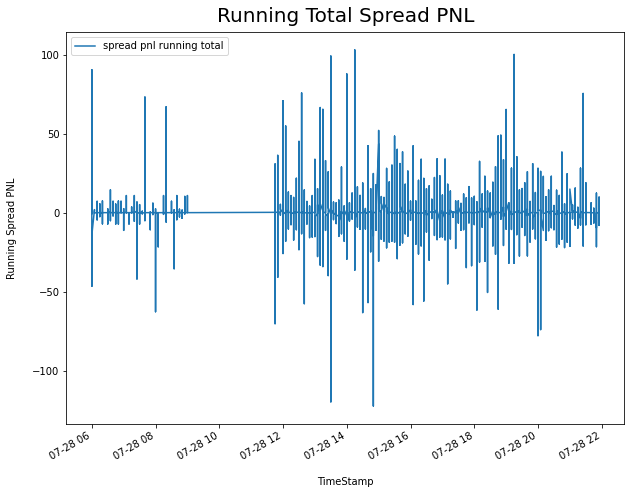

In [29]:
df.plot(x='timestamp', y='spread_pnl', kind='line', 
        figsize=(10, 8), legend=False, label="spread pnl running total")
plt.title("Running Total Spread PNL", y=1.01, fontsize=20)
plt.ylabel("Running Spread PNL", labelpad=15)
plt.xlabel("TimeStamp", labelpad=15)
plt.legend();

In [30]:
from pandas import DataFrame
import dateutil.parser as parser

In [31]:
#df.groupby(by=['timestamp', 'mat_bucket']).sum().groupby.cumsum()

In [32]:
df['running_pnl'] = df['spread_pnl'].cumsum()

In [33]:
df.head()

,timestamp,type,cusip,spread_pnl,benchmark_cusip,new_position,ticker,securitydes,industrySector,mat_bucket,liq_score,liq_bucket,weightedage,just_date,just_time,running_pnl
0,2021-07-28 06:00:00,MARK,718172CQ0,-0.62,91282CCK5,-39,PM,PM 1 1/8 05/01/23,"Consumer, Non-cyclical",B02,1487,LB1000,6.85,2021-07-28,06:00:00,-0.62
1,2021-07-28 06:00:00,MARK,718172CQ0,-0.62,91282CCK5,-39,PM,PM 1 1/8 05/01/23,"Consumer, Non-cyclical",B02,1487,LB1000,6.85,2021-07-28,06:00:00,-1.24
2,2021-07-28 06:00:00,MARK,03073EAS4,0.06,91282CCK5,5,ABC,ABC 0.737 03/15/23,"Consumer, Non-cyclical",B02,427,LB0250,1.00,2021-07-28,06:00:00,-1.18
3,2021-07-28 06:00:00,MARK,723484AH4,0.29,91282CCJ8,-13,PNW,PNW 1.3 06/15/25,Utilities,B05,2533,LB2000,27.00,2021-07-28,06:00:00,-0.89
4,2021-07-28 06:00:00,MARK,742718ER6,-0.21,91282CCJ8,2,PG,PG 2.45 11/03/26,"Consumer, Non-cyclical",B05,1916,LB1000,10.00,2021-07-28,06:00:00,-1.10


<AxesSubplot:xlabel='timestamp', ylabel='running_pnl'>

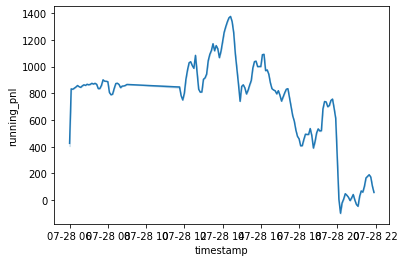

In [34]:
sns.lineplot(data=df, x="timestamp", y="running_pnl")

In [35]:
import streamlit as st

In [36]:
#st.line_chart(df)

In [37]:
#stremlit hello


SyntaxError: invalid syntax (<ipython-input-37-595a7c4a0b47>, line 1)

In [38]:
st.title("Streamlit Sliders")
st.subheader

2021-08-24 20:20:46.948 
  command:

    streamlit run /Users/lukeweeks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<bound method MarkdownMixin.subheader of DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)>

In [39]:
st.dataframe(df)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [40]:
import re
import base64

In [41]:

def df_filter(message,df):

        slider_1, slider_2 = st.slider('%s' % (message),0,len(df)-1,[0,len(df)-1],1)

        while len(str(df.iloc[slider_1][1]).replace('.0','')) < 4:
            df.iloc[slider_1,1] = '0' + str(df.iloc[slider_1][1]).replace('.0','')
            
        while len(str(df.iloc[slider_2][1]).replace('.0','')) < 4:
            df.iloc[slider_2,1] = '0' + str(df.iloc[slider_1][1]).replace('.0','')

        start_date = datetime.datetime.strptime(str(df.iloc[slider_1][0]).replace('.0','') + str(df.iloc[slider_1][1]).replace('.0',''),'%Y-%m-%d %H%M%S.$NS')
        start_date = start_date.strftime('%d %b %Y, %I:%M%p')
        
        end_date = datetime.datetime.strptime(str(df.iloc[slider_2][0]).replace('.0','') + str(df.iloc[slider_2][1]).replace('.0',''),'%Y-%m-%d %H%M%S.$NS')
        end_date = end_date.strftime('%d %b %Y, %I:%M%p')

        st.info('Start: **%s** End: **%s**' % (start_date,end_date))
        
        filtered_df = df.iloc[slider_1:slider_2+1][:].reset_index(drop=True)

        return filtered_df

In [52]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,55718,159,2021-07-28 20:55:00,470,2021-07-28 06:00:00,2021-07-28 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,55718,1,MARK,55718,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cusip,55718,476,458140BH2,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spread_pnl,"55,718.00",NaN,NaN,NaN,NaT,NaT,0.00,3.23,-122.42,-0.18,0.00,0.20,103.07
benchmark_cusip,55718,4,91282CCJ8,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_position,"55,718.00",NaN,NaN,NaN,NaT,NaT,11.34,65.69,-250.00,-18.00,7.00,38.00,250.00
ticker,55718,189,GM,1955,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
securitydes,55718,475,ABIBB 3.65 02/01/26,269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industrySector,55718,9,Financial,17194,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mat_bucket,55718,4,B05,30654,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_test=df.groupby(by=["cusip", "ticker"]).spread_pnl.sum()

In [58]:
df_test.sample(476)

cusip      ticker
375558BX0  GILD      -0.69
13607HVE9  CM        -7.64
023135BP0  AMZN       3.16
037833CU2  AAPL     -16.49
30231GAF9  XOM       21.78
                     ...  
064159MK9  BNS        1.39
902494BJ1  TSN      -33.49
06406FAD5  BK        -6.11
70450YAC7  PYPL      -3.64
928563AC9  VMW       28.67
Name: spread_pnl, Length: 476, dtype: float64

In [59]:
df_test.to_csv('test.csv')

In [60]:
df_test1 = pd.read_csv('test.csv')
df_test1.head()


,cusip,ticker,spread_pnl
0,00206RCN0,T,42.42
1,00206RCT7,T,-4.18
2,00206RDC3,T,12.14
3,00206RDQ2,T,58.19
4,00206RHW5,T,23.27


In [61]:
df_test.describe(include='all').T

count    476.00
mean       0.10
std       33.02
min     -266.04
25%       -5.10
50%        0.78
75%        7.46
max      168.83
Name: spread_pnl, dtype: float64